In [2]:
import csv
from collections import Counter
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
import json

data = []
with open('Rana_Ayyub_01.json') as f:
    for line in f:
        data.append(json.loads(line))
# print(len(data))
with open('Rana_Ayyub_02.json') as f1:
    for line in f1:
        data.append(json.loads(line))
# print(len(data))
Rana_Ayyub_id = '268676434'

In [3]:
sentiment_score = {}
with open("aggregated_df_updated.csv", 'r') as file:
    csvreader = csv.reader(file)
    count = 0
    for row in csvreader:
        if count == 0:
            pass
        else:
            try:
                sentiment_score[row[0]] = [float(row[1]), float(row[2]), float(row[3])]
            except:
                pass
        count +=1

In [15]:
old_model_attackers = []
new_model_attackers = []
old_model_normal = []
new_model_normal = []
with open("coordinated_details.csv", 'r') as file:
    csvreader = csv.reader(file)
    count = 0
    for row in csvreader:
        if count == 0:
            pass
        else:
            if row[1] == '1':
                old_model_attackers.append(row[0])
            else:
                old_model_normal.append(row[0])
            if row[2] == '1':
                new_model_attackers.append(row[0])
            else:
                new_model_normal.append(row[0])
        count += 1
print(len(old_model_attackers))
print(len(new_model_attackers))
print(len(old_model_normal))
print(len(new_model_normal))

2135
3452
187905
186588


In [16]:
cluster_old = set(old_model_attackers)
cluster_new = set(new_model_attackers)
cluster_old_normal = set(old_model_normal)
cluster_new_normal = set(new_model_normal)
print(len(cluster_old.intersection(cluster_new)))

513


In [6]:
old_cluster_tweets = []
author_tweets_old = {}
for index in range(len(data)):
    tweets_arr = data[index]['includes']['tweets']
    for i in range(len(tweets_arr)):  
        if tweets_arr[i]['author_id'] in cluster_old:
            old_cluster_tweets.append(tweets_arr[i]['text'])
            if tweets_arr[i]['author_id'] in author_tweets_old:
                author_tweets_old[tweets_arr[i]['author_id']].append(tweets_arr[i]['text'])
            else:
                author_tweets_old[tweets_arr[i]['author_id']] = []

In [7]:
new_cluster_tweets = []
author_tweets_new = {}
for index in range(len(data)):
    tweets_arr = data[index]['includes']['tweets']
    for i in range(len(tweets_arr)):  
        if tweets_arr[i]['author_id'] in cluster_new:
            new_cluster_tweets.append(tweets_arr[i]['text'])
            if tweets_arr[i]['author_id'] in author_tweets_new:
                author_tweets_new[tweets_arr[i]['author_id']].append(tweets_arr[i]['text'])
            else:
                author_tweets_new[tweets_arr[i]['author_id']] = []

In [8]:
old_cluster_normal_tweets = []
author_tweets_old_normal = {}
for index in range(len(data)):
    tweets_arr = data[index]['includes']['tweets']
    for i in range(len(tweets_arr)):  
        if tweets_arr[i]['author_id'] in cluster_old_normal:
            old_cluster_normal_tweets.append(tweets_arr[i]['text'])
            if tweets_arr[i]['author_id'] in author_tweets_old_normal:
                author_tweets_old_normal[tweets_arr[i]['author_id']].append(tweets_arr[i]['text'])
            else:
                author_tweets_old_normal[tweets_arr[i]['author_id']] = []

In [9]:
new_cluster_normal_tweets = []
author_tweets_new_normal = {}
for index in range(len(data)):
    tweets_arr = data[index]['includes']['tweets']
    for i in range(len(tweets_arr)):  
        if tweets_arr[i]['author_id'] in cluster_new_normal:
            new_cluster_normal_tweets.append(tweets_arr[i]['text'])
            if tweets_arr[i]['author_id'] in author_tweets_new_normal:
                author_tweets_new_normal[tweets_arr[i]['author_id']].append(tweets_arr[i]['text'])
            else:
                author_tweets_new_normal[tweets_arr[i]['author_id']] = []

11
0
43


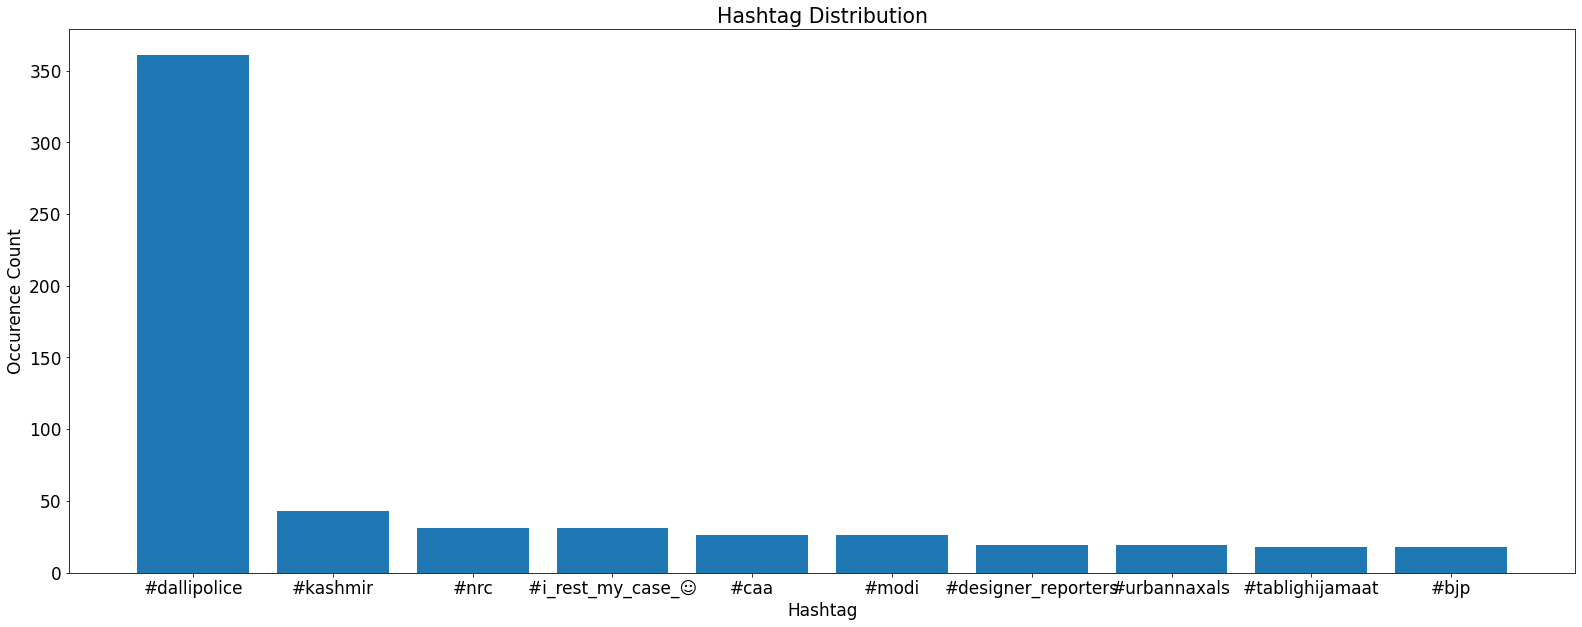

In [80]:
hashtags = []
for tweet in old_cluster_tweets:
    indices = [i for i, symbol in enumerate(tweet) if symbol == "#"]
    for index in indices:
        end_index = tweet[index:].find(" ")
        other_end_index = tweet[index+1:].find("#")
        if end_index == -1 or other_end_index == -1:
            hashtags.append(tweet[index:max(end_index, other_end_index)+index].lower())
        else:
            hashtags.append(tweet[index:min(end_index, other_end_index)+index].lower())

counter_data = Counter(hashtags)
print(counter_data["#presstitutes"])
print(counter_data["#standwithranaayyub"])
print(counter_data["#kashmir"])
del counter_data['#अखं\u200dडभारत']
del counter_data[""]
most_common = dict(counter_data.most_common(10))
plt.figure(figsize=(27,10))
plt.rcParams['font.size'] = 17
plt.bar(most_common.keys(), most_common.values())
plt.xlabel("Hashtag")
plt.ylabel("Occurence Count")
plt.title("Hashtag Distribution")
plt.show()

313
229


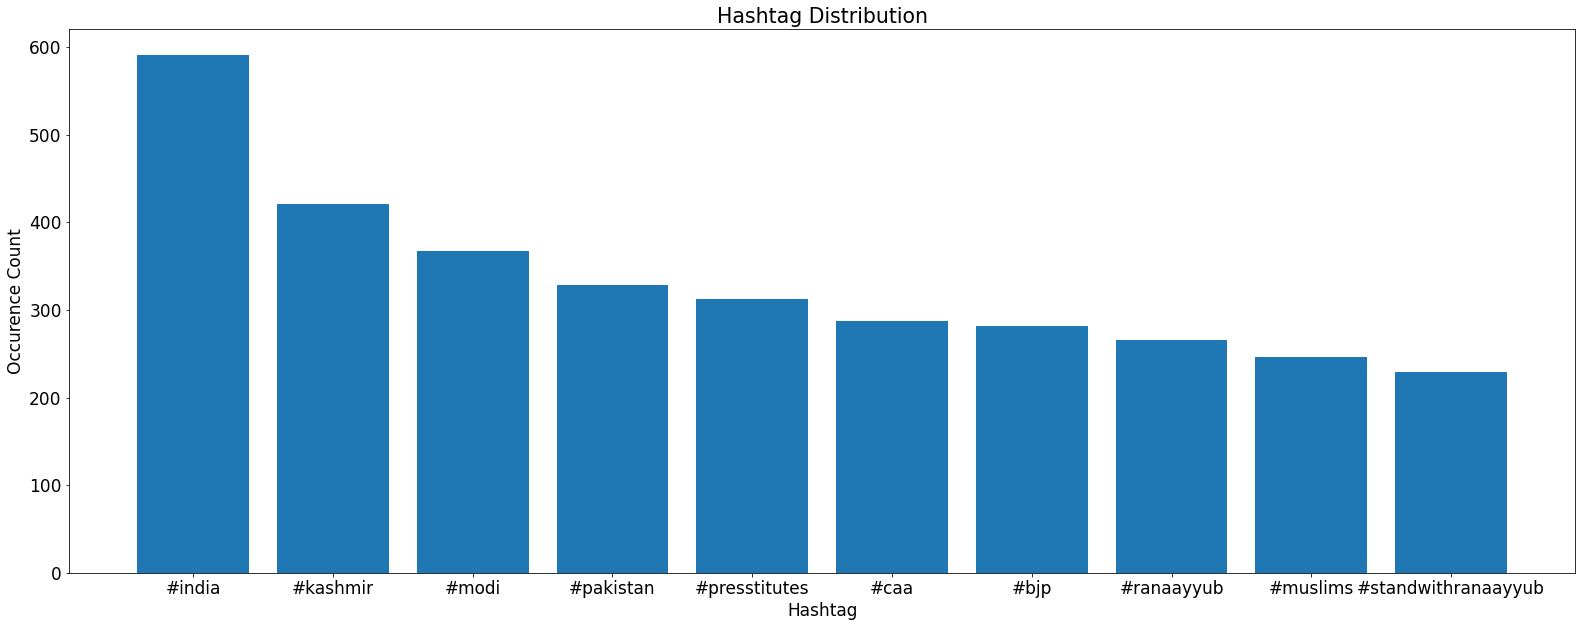

In [83]:
hashtags1 = []
for tweet in old_cluster_normal_tweets:
    indices = [i for i, symbol in enumerate(tweet) if symbol == "#"]
    for index in indices:
        end_index = tweet[index:].find(" ")
        other_end_index = tweet[index+1:].find("#")
        if end_index == -1 or other_end_index == -1:
            hashtags1.append(tweet[index:max(end_index, other_end_index)+index].lower())
        else:
            hashtags1.append(tweet[index:min(end_index, other_end_index)+index].lower())

counter_data = Counter(hashtags1)
del counter_data [""]
del counter_data["#"]
most_common = dict(counter_data.most_common(10))

print(counter_data["#presstitutes"])
print(counter_data["#standwithranaayyub"])
plt.figure(figsize=(27,10))
plt.rcParams['font.size'] = 17
plt.bar(most_common.keys(), most_common.values())
plt.xlabel("Hashtag")
plt.ylabel("Occurence Count")
plt.title("Hashtag Distribution")
plt.show()

313
228


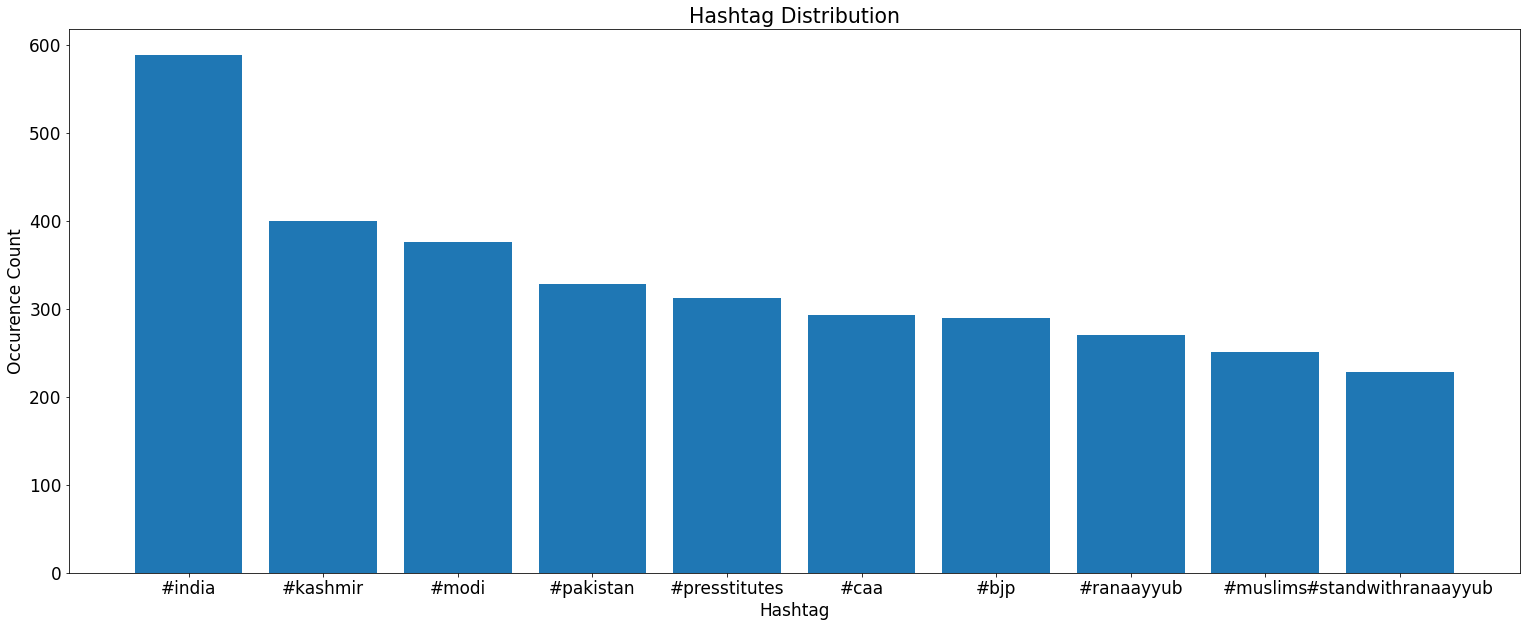

In [86]:
hashtags1 = []
for tweet in new_cluster_normal_tweets:
    indices = [i for i, symbol in enumerate(tweet) if symbol == "#"]
    for index in indices:
        end_index = tweet[index:].find(" ")
        other_end_index = tweet[index+1:].find("#")
        if end_index == -1 or other_end_index == -1:
            hashtags1.append(tweet[index:max(end_index, other_end_index)+index].lower())
        else:
            hashtags1.append(tweet[index:min(end_index, other_end_index)+index].lower())

counter_data = Counter(hashtags1)
del counter_data [""]
del counter_data ["#"]
most_common = dict(counter_data.most_common(10))
print(counter_data["#presstitutes"])
print(counter_data["#standwithranaayyub"])
plt.figure(figsize=(26,10))
plt.rcParams['font.size'] = 17
plt.bar(most_common.keys(), most_common.values())
plt.xlabel("Hashtag")
plt.ylabel("Occurence Count")
plt.title("Hashtag Distribution")
plt.show()

11
1


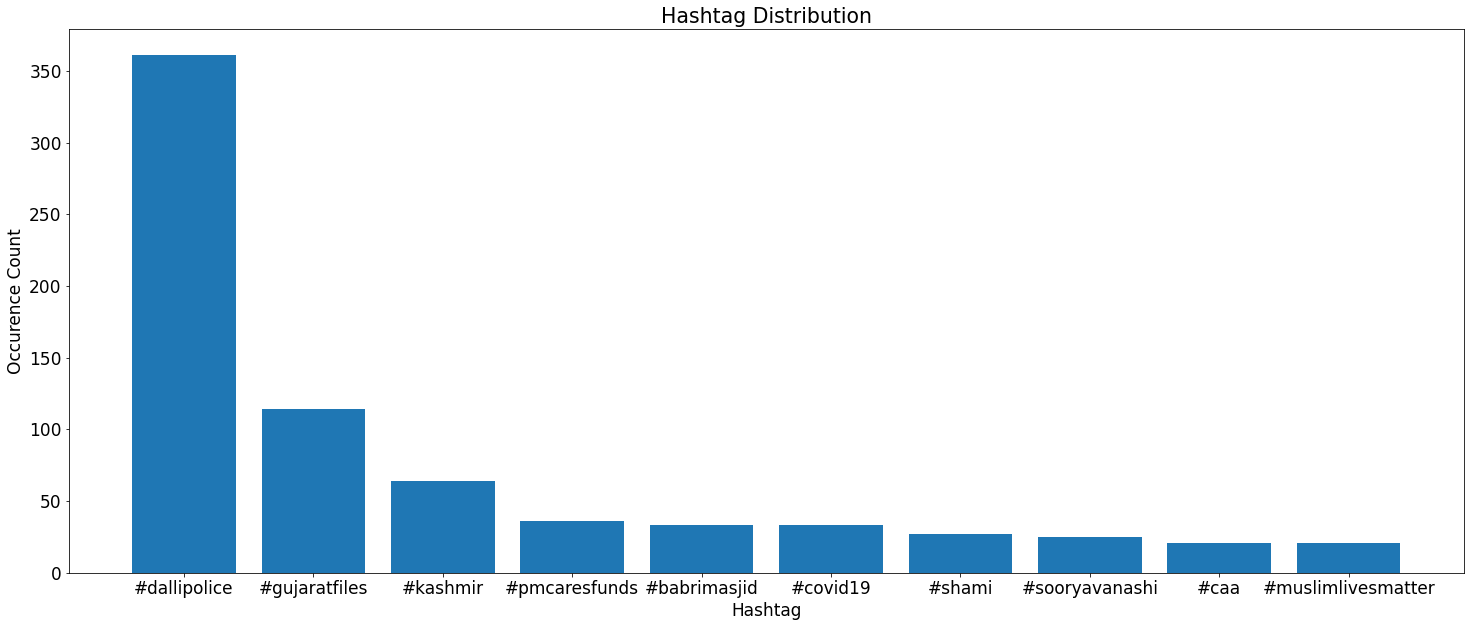

In [90]:
hashtags1 = []
for tweet in new_cluster_tweets:
    indices = [i for i, symbol in enumerate(tweet) if symbol == "#"]
    for index in indices:
        end_index = tweet[index:].find(" ")
        other_end_index = tweet[index+1:].find("#")
        if end_index == -1 or other_end_index == -1:
            hashtags1.append(tweet[index:max(end_index, other_end_index)+index].lower())
        else:
            hashtags1.append(tweet[index:min(end_index, other_end_index)+index].lower())

counter_data = Counter(hashtags1)
del counter_data [""]
del counter_data ["#बाबरी_मस्जिद_याद_रखी_जाएगी\n"]
del counter_data ["#अखं\u200dडभारत"]
most_common = dict(counter_data.most_common(10))
print(counter_data["#presstitutes"])
print(counter_data["#standwithranaayyub"])
plt.figure(figsize=(25,10))
plt.rcParams['font.size'] = 17
plt.bar(most_common.keys(), most_common.values())
plt.xlabel("Hashtag")
plt.ylabel("Occurence Count")
plt.title("Hashtag Distribution")
plt.show()

In [42]:
old_model_sentiment = [0,0,0]
count = 0
total_users = 0
for user in old_model_attackers:
    if user in sentiment_score.keys():
        old_model_sentiment[0] += sentiment_score[user][0]
        old_model_sentiment[1] += sentiment_score[user][1]
        old_model_sentiment[2] += sentiment_score[user][2]
        total_users += 1
    else:
        count += 1
average_old_model_sentiment = [old_model_sentiment[0]/total_users, old_model_sentiment[1]/total_users, old_model_sentiment[2]/total_users]
print(average_old_model_sentiment)
print(count)

[0.33716739035871307, 0.5423564058538947, 0.12047620338815934]
0


In [44]:
new_model_sentiment = [0,0,0]
count = 0
total_users = 0
for user in new_model_attackers:
    if user in sentiment_score.keys():
        new_model_sentiment[0] += sentiment_score[user][0]
        new_model_sentiment[1] += sentiment_score[user][1]
        new_model_sentiment[2] += sentiment_score[user][2]
        total_users += 1
    else:
        count += 1
average_new_model_sentiment = [new_model_sentiment[0]/total_users, new_model_sentiment[1]/total_users, new_model_sentiment[2]/total_users]
print(average_new_model_sentiment)
print(count)

[0.31946772280282953, 0.5568208183385971, 0.12371145892555054]
0


In [43]:
old_model_normal_sentiment = [0,0,0]
count = 0
total_users = 0
for user in old_model_normal:
    if user in sentiment_score.keys():
        old_model_normal_sentiment[0] += sentiment_score[user][0]
        old_model_normal_sentiment[1] += sentiment_score[user][1]
        old_model_normal_sentiment[2] += sentiment_score[user][2]
        total_users += 1
    else:
        count += 1
average_old_model_normal_sentiment = [old_model_normal_sentiment[0]/total_users, old_model_normal_sentiment[1]/total_users, old_model_normal_sentiment[2]/total_users]
print(average_old_model_normal_sentiment)
print(count)

[0.3062781865490356, 0.5507288732166971, 0.1429929403790112]
8


In [45]:
new_model_normal_sentiment = [0,0,0]
count = 0
total_users = 0
for user in new_model_normal:
    if user in sentiment_score.keys():
        new_model_normal_sentiment[0] += sentiment_score[user][0]
        new_model_normal_sentiment[1] += sentiment_score[user][1]
        new_model_normal_sentiment[2] += sentiment_score[user][2]
        total_users += 1
    else:
        count += 1
average_new_model_normal_sentiment = [new_model_normal_sentiment[0]/total_users, new_model_normal_sentiment[1]/total_users, new_model_normal_sentiment[2]/total_users]
print(average_new_model_normal_sentiment)
print(count)

[0.30638762041646855, 0.5505203588401278, 0.14309202088336256]
8


In [15]:
authors = author_tweets_old.keys()
repeat_text = 0
total_text = 0
for key in authors:
    check_set = set()
    total_text += len(author_tweets_old[key])
    for j in range(len(author_tweets_old[key])):
        if author_tweets_old[key][j] in check_set:
            repeat_text += 1
        else:
            check_set.add(author_tweets_old[key][j])
print(repeat_text/total_text)

0.08554662644639785


In [16]:
authors = author_tweets_new.keys()
repeat_text = 0
total_text = 0
for key in authors:
    check_set = set()
    total_text += len(author_tweets_new[key])
    for j in range(len(author_tweets_new[key])):
        if author_tweets_new[key][j] in check_set:
            repeat_text += 1
        else:
            check_set.add(author_tweets_new[key][j])
print(repeat_text/total_text)

0.21269594856824664


In [17]:
authors = author_tweets_old_normal.keys()
repeat_text = 0
total_text = 0
for key in authors:
    check_set = set()
    total_text += len(author_tweets_old_normal[key])
    for j in range(len(author_tweets_old_normal[key])):
        if author_tweets_old_normal[key][j] in check_set:
            repeat_text += 1
        else:
            check_set.add(author_tweets_old_normal[key][j])
print(repeat_text/total_text)

0.08528521123142616


In [18]:
authors = author_tweets_new_normal.keys()
repeat_text = 0
total_text = 0
for key in authors:
    check_set = set()
    total_text += len(author_tweets_new_normal[key])
    for j in range(len(author_tweets_new_normal[key])):
        if author_tweets_new_normal[key][j] in check_set:
            repeat_text += 1
        else:
            check_set.add(author_tweets_new_normal[key][j])
print(repeat_text/total_text)

0.07393778492167052


In [46]:
authors = author_tweets_old.keys()
repeat_text = 0
total_text = 0
check_set = set()
for key in authors:
    total_text += len(author_tweets_old[key])
    for j in range(len(author_tweets_old[key])):
        if author_tweets_old[key][j] in check_set:
            repeat_text += 1
        else:
            check_set.add(author_tweets_old[key][j])
print(repeat_text/total_text)

0.08846888035255579


In [47]:
authors = author_tweets_new.keys()
repeat_text = 0
total_text = 0
check_set = set()
for key in authors:
    total_text += len(author_tweets_new[key])
    for j in range(len(author_tweets_new[key])):
        if author_tweets_new[key][j] in check_set:
            repeat_text += 1
        else:
            check_set.add(author_tweets_new[key][j])
print(repeat_text/total_text)

0.21502455157518183


In [48]:
authors = author_tweets_old_normal.keys()
repeat_text = 0
total_text = 0
check_set = set()
for key in authors:
    total_text += len(author_tweets_old_normal[key])
    for j in range(len(author_tweets_old_normal[key])):
        if author_tweets_old_normal[key][j] in check_set:
            repeat_text += 1
        else:
            check_set.add(author_tweets_old_normal[key][j])
print(repeat_text/total_text)

0.09991090130594907


In [49]:
authors = author_tweets_new_normal.keys()
repeat_text = 0
total_text = 0
check_set = set()
for key in authors:
    total_text += len(author_tweets_new_normal[key])
    for j in range(len(author_tweets_new_normal[key])):
        if author_tweets_new_normal[key][j] in check_set:
            repeat_text += 1
        else:
            check_set.add(author_tweets_new_normal[key][j])
print(repeat_text/total_text)

0.08887072815029867


In [ ]:
# Follower_ratio, Number of tweets, Age of account creation, Interactions amongst same group, 
# inactive periods, average number of tweets in participated conversations, seen posting together -> community detection
# Difference between set intersection and not

In [70]:
data[10]['includes']['users'][0]

{'username': 'Razak_patel1',
 'profile_image_url': 'https://pbs.twimg.com/profile_images/768387462531944448/lWqULQds_normal.jpg',
 'created_at': '2016-08-24T09:48:35.000Z',
 'location': 'Patna, India',
 'name': 'Razak',
 'description': 'Nationalist. Believe in Indian ethos and values. Disapprove hippocracy and deceit in public life. Disapprove Journos, Fake intellectuals manufacturing stories.',
 'id': '768384498207592448',
 'verified': False,
 'protected': False,
 'public_metrics': {'followers_count': 6,
  'following_count': 54,
  'tweet_count': 1408,
  'listed_count': 0}}

In [51]:
old_cluster_attacker_user_data = {}
for index in range(len(data)):
    users_arr = data[index]['includes']['users']
    for i in range(len(users_arr)):  
        if users_arr[i]['id'] in cluster_old:
            if users_arr[i]['id'] in old_cluster_attacker_user_data:
                pass
            else:
                old_cluster_attacker_user_data[users_arr[i]['id']] = [users_arr[i]['created_at'], users_arr[i]['id'], users_arr[i]['public_metrics']['followers_count'], users_arr[i]['public_metrics']['following_count'], users_arr[i]['public_metrics']['tweet_count']]
   

In [80]:
print(old_cluster_attacker_user_data[list(old_cluster_attacker_user_data.keys())[0]])    

['2010-07-24T18:28:48.000Z', '170395745', 219, 1154, 15422]


In [52]:
old_cluster_attacker_creation_date = []
old_cluster_attacker_followers_count = []
old_cluster_attacker_following_count = []
old_cluster_attacker_tweet_count = []
for key in old_cluster_attacker_user_data:
    old_cluster_attacker_creation_date.append(old_cluster_attacker_user_data[key][0])
    old_cluster_attacker_followers_count.append(old_cluster_attacker_user_data[key][2])
    old_cluster_attacker_following_count.append(old_cluster_attacker_user_data[key][3])
    old_cluster_attacker_tweet_count.append(old_cluster_attacker_user_data[key][4])
    
old_cluster_attacker_following_count_sum = 0
old_cluster_attacker_followers_count_sum = 0
old_cluster_attacker_tweet_count_sum = 0
for i in range(len(old_cluster_attacker_following_count)):
    old_cluster_attacker_following_count_sum += old_cluster_attacker_following_count[i]
    old_cluster_attacker_followers_count_sum += old_cluster_attacker_followers_count[i]
    old_cluster_attacker_tweet_count_sum += old_cluster_attacker_tweet_count[i]

old_cluster_attacker_following_count_avg = old_cluster_attacker_following_count_sum/(len(old_cluster_attacker_following_count))
old_cluster_attacker_followers_count_avg = old_cluster_attacker_followers_count_sum/(len(old_cluster_attacker_following_count))
old_cluster_attacker_tweet_count_avg = old_cluster_attacker_tweet_count_sum/(len(old_cluster_attacker_following_count))
print(old_cluster_attacker_following_count_avg)
print(old_cluster_attacker_followers_count_avg)
print(old_cluster_attacker_tweet_count_avg)
print(old_cluster_attacker_following_count_avg/old_cluster_attacker_followers_count_avg)
    

999.031850117096
1966.9456674473067
22010.971896955503
0.5079102420829118


In [53]:
new_cluster_attacker_user_data = {}
for index in range(len(data)):
    users_arr = data[index]['includes']['users']
    for i in range(len(users_arr)):  
        if users_arr[i]['id'] in cluster_new:
            if users_arr[i]['id'] in new_cluster_attacker_user_data:
                pass
            else:
                new_cluster_attacker_user_data[users_arr[i]['id']] = [users_arr[i]['created_at'], users_arr[i]['id'], users_arr[i]['public_metrics']['followers_count'], users_arr[i]['public_metrics']['following_count'], users_arr[i]['public_metrics']['tweet_count']]
   

In [54]:
new_cluster_attacker_creation_date = []
new_cluster_attacker_followers_count = []
new_cluster_attacker_following_count = []
new_cluster_attacker_tweet_count = []
for key in new_cluster_attacker_user_data:
    new_cluster_attacker_creation_date.append(new_cluster_attacker_user_data[key][0])
    new_cluster_attacker_followers_count.append(new_cluster_attacker_user_data[key][2])
    new_cluster_attacker_following_count.append(new_cluster_attacker_user_data[key][3])
    new_cluster_attacker_tweet_count.append(new_cluster_attacker_user_data[key][4])
    
new_cluster_attacker_following_count_sum = 0
new_cluster_attacker_followers_count_sum = 0
new_cluster_attacker_tweet_count_sum = 0
for i in range(len(new_cluster_attacker_following_count)):
    new_cluster_attacker_following_count_sum += new_cluster_attacker_following_count[i]
    new_cluster_attacker_followers_count_sum += new_cluster_attacker_followers_count[i]
    new_cluster_attacker_tweet_count_sum += new_cluster_attacker_tweet_count[i]

new_cluster_attacker_following_count_avg = new_cluster_attacker_following_count_sum/(len(new_cluster_attacker_following_count))
new_cluster_attacker_followers_count_avg = new_cluster_attacker_followers_count_sum/(len(new_cluster_attacker_following_count))
new_cluster_attacker_tweet_count_avg = new_cluster_attacker_tweet_count_sum/(len(new_cluster_attacker_following_count))
print(new_cluster_attacker_following_count_avg)
print(new_cluster_attacker_followers_count_avg)
print(new_cluster_attacker_tweet_count_avg)
print(new_cluster_attacker_following_count_avg/new_cluster_attacker_followers_count_avg)
    

841.0196987253765
1867.8606604866743
17298.779548088063
0.45025826418242965


In [55]:
old_normal_cluster_attacker_user_data = {}
for index in range(len(data)):
    users_arr = data[index]['includes']['users']
    for i in range(len(users_arr)):  
        if users_arr[i]['id'] in cluster_old_normal:
            if users_arr[i]['id'] in old_normal_cluster_attacker_user_data:
                pass
            else:
                old_normal_cluster_attacker_user_data[users_arr[i]['id']] = [users_arr[i]['created_at'], users_arr[i]['id'], users_arr[i]['public_metrics']['followers_count'], users_arr[i]['public_metrics']['following_count'], users_arr[i]['public_metrics']['tweet_count']]
   

In [56]:
old_normal_cluster_attacker_creation_date = []
old_normal_cluster_attacker_followers_count = []
old_normal_cluster_attacker_following_count = []
old_normal_cluster_attacker_tweet_count = []
for key in old_normal_cluster_attacker_user_data:
    old_normal_cluster_attacker_creation_date.append(old_normal_cluster_attacker_user_data[key][0])
    old_normal_cluster_attacker_followers_count.append(old_normal_cluster_attacker_user_data[key][2])
    old_normal_cluster_attacker_following_count.append(old_normal_cluster_attacker_user_data[key][3])
    old_normal_cluster_attacker_tweet_count.append(old_normal_cluster_attacker_user_data[key][4])
    
old_normal_cluster_attacker_following_count_sum = 0
old_normal_cluster_attacker_followers_count_sum = 0
old_normal_cluster_attacker_tweet_count_sum = 0
for i in range(len(old_normal_cluster_attacker_following_count)):
    old_normal_cluster_attacker_following_count_sum += old_normal_cluster_attacker_following_count[i]
    old_normal_cluster_attacker_followers_count_sum += old_normal_cluster_attacker_followers_count[i]
    old_normal_cluster_attacker_tweet_count_sum += old_normal_cluster_attacker_tweet_count[i]

old_normal_cluster_attacker_following_count_avg = old_normal_cluster_attacker_following_count_sum/(len(old_normal_cluster_attacker_following_count))
old_normal_cluster_attacker_followers_count_avg = old_normal_cluster_attacker_followers_count_sum/(len(old_normal_cluster_attacker_following_count))
old_normal_cluster_attacker_tweet_count_avg = old_normal_cluster_attacker_tweet_count_sum/(len(old_normal_cluster_attacker_following_count))
print(old_normal_cluster_attacker_following_count_avg)
print(old_normal_cluster_attacker_followers_count_avg)
print(old_normal_cluster_attacker_tweet_count_avg)
print(old_normal_cluster_attacker_following_count_avg/old_normal_cluster_attacker_followers_count_avg)
    

697.3664192011921
1430.0018466778424
12714.779420451823
0.4876681948497498


In [57]:
new_normal_cluster_attacker_user_data = {}
for index in range(len(data)):
    users_arr = data[index]['includes']['users']
    for i in range(len(users_arr)):  
        if users_arr[i]['id'] in cluster_new_normal:
            if users_arr[i]['id'] in new_normal_cluster_attacker_user_data:
                pass
            else:
                new_normal_cluster_attacker_user_data[users_arr[i]['id']] = [users_arr[i]['created_at'], users_arr[i]['id'], users_arr[i]['public_metrics']['followers_count'], users_arr[i]['public_metrics']['following_count'], users_arr[i]['public_metrics']['tweet_count']]
   

In [58]:
new_normal_cluster_attacker_creation_date = []
new_normal_cluster_attacker_followers_count = []
new_normal_cluster_attacker_following_count = []
new_normal_cluster_attacker_tweet_count = []
for key in new_normal_cluster_attacker_user_data:
    new_normal_cluster_attacker_creation_date.append(new_normal_cluster_attacker_user_data[key][0])
    new_normal_cluster_attacker_followers_count.append(new_normal_cluster_attacker_user_data[key][2])
    new_normal_cluster_attacker_following_count.append(new_normal_cluster_attacker_user_data[key][3])
    new_normal_cluster_attacker_tweet_count.append(new_normal_cluster_attacker_user_data[key][4])
    
new_normal_cluster_attacker_following_count_sum = 0
new_normal_cluster_attacker_followers_count_sum = 0
new_normal_cluster_attacker_tweet_count_sum = 0
for i in range(len(new_normal_cluster_attacker_following_count)):
    new_normal_cluster_attacker_following_count_sum += new_normal_cluster_attacker_following_count[i]
    new_normal_cluster_attacker_followers_count_sum += new_normal_cluster_attacker_followers_count[i]
    new_normal_cluster_attacker_tweet_count_sum += new_normal_cluster_attacker_tweet_count[i]

new_normal_cluster_attacker_following_count_avg = new_normal_cluster_attacker_following_count_sum/(len(new_normal_cluster_attacker_following_count))
new_normal_cluster_attacker_followers_count_avg = new_normal_cluster_attacker_followers_count_sum/(len(new_normal_cluster_attacker_following_count))
new_normal_cluster_attacker_tweet_count_avg = new_normal_cluster_attacker_tweet_count_sum/(len(new_normal_cluster_attacker_following_count))
print(new_normal_cluster_attacker_following_count_avg)
print(new_normal_cluster_attacker_followers_count_avg)
print(new_normal_cluster_attacker_tweet_count_avg)
print(new_normal_cluster_attacker_following_count_avg/new_normal_cluster_attacker_followers_count_avg)
    

698.1604926361824
1428.0450564880914
12736.34244967522
0.48889248239346744


2015.1081967213115


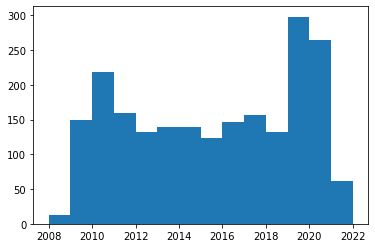

In [31]:
old_cluster_creation_year = []
for key in old_cluster_attacker_user_data:
    old_cluster_creation_year.append(datetime.fromisoformat(old_cluster_attacker_user_data[key][0][:19]).year)
print(sum(old_cluster_creation_year)/len(old_cluster_creation_year))
plt.hist(old_cluster_creation_year, bins=[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
plt.show()

2015.1654113557358


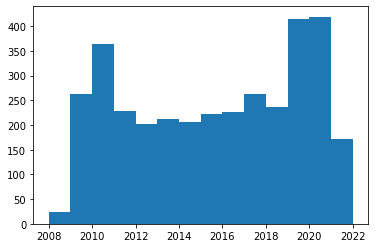

In [32]:
new_cluster_creation_year = []
for key in new_cluster_attacker_user_data:
    new_cluster_creation_year.append(datetime.fromisoformat(new_cluster_attacker_user_data[key][0][:19]).year)
print(sum(new_cluster_creation_year)/len(new_cluster_creation_year))
plt.hist(new_cluster_creation_year, bins=[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
plt.show()

2015.3277507251005


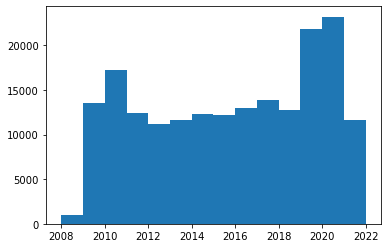

In [33]:
old_normal_cluster_creation_year = []
for key in old_normal_cluster_attacker_user_data:
    old_normal_cluster_creation_year.append(datetime.fromisoformat(old_normal_cluster_attacker_user_data[key][0][:19]).year)
print(sum(old_normal_cluster_creation_year)/len(old_normal_cluster_creation_year))
plt.hist(old_normal_cluster_creation_year, bins=[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
plt.show()

2015.3282419019445


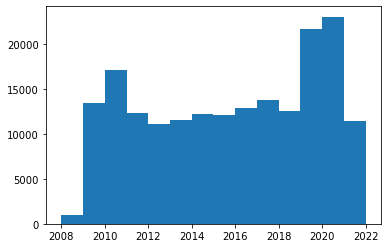

In [34]:
new_normal_cluster_creation_year = []
for key in new_normal_cluster_attacker_user_data:
    new_normal_cluster_creation_year.append(datetime.fromisoformat(new_normal_cluster_attacker_user_data[key][0][:19]).year)
print(sum(new_normal_cluster_creation_year)/len(new_normal_cluster_creation_year))
plt.hist(new_normal_cluster_creation_year, bins=[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
plt.show()

In [35]:
ascending_order_tweets = {}
all_conversation_ids = set()
rana_ayyub_conversation_ids = set()
for index in range(len(data)):
    tweets_arr = data[index]['includes']['tweets']
    for i in range(len(tweets_arr)):
        all_conversation_ids.add(tweets_arr[i]['conversation_id'])    
        if (tweets_arr[i]['conversation_id'] == tweets_arr[i]['id']) and (tweets_arr[i]['author_id'] == '268676434'):
            ascending_order_tweets[tweets_arr[i]['conversation_id']] = [tweets_arr[i]['created_at'], tweets_arr[i]['conversation_id']]
            rana_ayyub_conversation_ids.add(tweets_arr[i]['conversation_id'])
print(len(all_conversation_ids))
print(len(rana_ayyub_conversation_ids))

15940
4690


In [36]:
all_conversation_data = {}
for key in all_conversation_ids:
    all_conversation_data[key] = []


for index in range(len(data)):
    tweets_arr = data[index]['includes']['tweets']
    for i in range(len(tweets_arr)):
        all_conversation_data[tweets_arr[i]['conversation_id']].append(tweets_arr[i])

In [37]:
average_frequency_replies = {}
for conversation in all_conversation_ids:
    temp_dict = {}
    for tweet in all_conversation_data[conversation]:
        if tweet['author_id'] in temp_dict.keys():
            temp_dict[tweet['author_id']] += 1
        else:
            temp_dict[tweet['author_id']] = 1
    for key in temp_dict.keys():
        if key in average_frequency_replies.keys():
            average_frequency_replies[key][0] += temp_dict[key]
            average_frequency_replies[key][1] += 1
        else:
            average_frequency_replies[key] = [temp_dict[key], 1] 

In [38]:
average_reply = {}
for key in average_frequency_replies.keys():
    average_reply[key] = average_frequency_replies[key][0]/average_frequency_replies[key][1]

In [39]:
cluster_old_average_reply = []
cluster_new_average_reply = []
cluster_old_normal_cluster_reply = []
cluster_new_normal_cluster_reply = []
for i in range(len(old_model_attackers)):
    cluster_old_average_reply.append(average_reply[old_model_attackers[i]])
for i in range(len(new_model_attackers)):
    cluster_new_average_reply.append(average_reply[new_model_attackers[i]])
for i in range(len(old_model_normal)):
    cluster_old_normal_cluster_reply.append(average_reply[old_model_normal[i]])
for i in range(len(new_model_normal)):
    cluster_new_normal_cluster_reply.append(average_reply[new_model_normal[i]])

1.7403565992349728


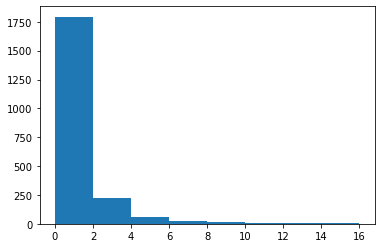

In [40]:
average = sum(cluster_old_average_reply)/len(cluster_old_average_reply)
print(average)
plt.hist(cluster_old_average_reply, bins=[0,2,4,6,8,10,12,14,16])
plt.show()

2.525831946471728


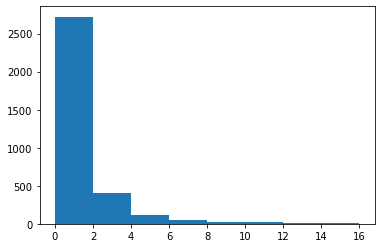

In [41]:
average = sum(cluster_new_average_reply)/len(cluster_new_average_reply)
print(average)
plt.hist(cluster_new_average_reply, bins=[0,2,4,6,8,10,12,14,16])
plt.show()

1.3245487313603395


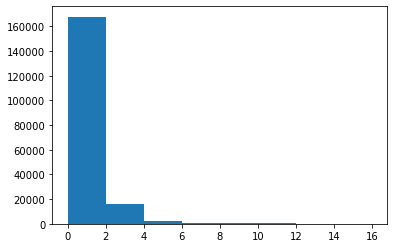

In [42]:
average = sum(cluster_old_normal_cluster_reply)/len(cluster_old_normal_cluster_reply)
print(average)
plt.hist(cluster_old_normal_cluster_reply, bins=[0,2,4,6,8,10,12,14,16])
plt.show()

1.307082013990234


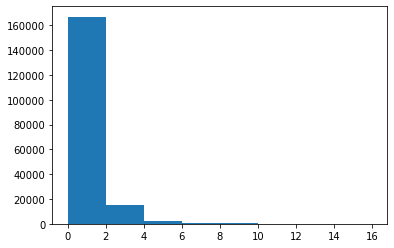

In [43]:
average = sum(cluster_new_normal_cluster_reply)/len(cluster_new_normal_cluster_reply)
print(average)
plt.hist(cluster_new_normal_cluster_reply, bins=[0,2,4,6,8,10,12,14,16])
plt.show()

In [8]:
paired_people = {}

In [9]:
import math

In [11]:
dict_count = {}
with open("edge_data.csv", 'r') as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        if int(row[3]) in dict_count:
            dict_count[int(row[3])] += 1
        else:
            dict_count[int(row[3])] = 1
        paired_people[(row[0], row[1])] = int(row[2]) * math.log(1+int(row[3]))

In [12]:
person_collaboration = {}
same_person_multiple = {}
for key in paired_people.keys():
    if key[0] == key[1]:
        same_person_multiple[key[0]] = paired_people[key]
        continue

    if key[0] in person_collaboration:
        person_collaboration[key[0]] = [person_collaboration[key[0]][0] + int(paired_people[key]), person_collaboration[key[0]][1]+1]
    else:
        person_collaboration[key[0]] = [int(paired_people[key]), 1]
        
    if key[1] in person_collaboration:
        person_collaboration[key[1]] = [person_collaboration[key[1]][0] + int(paired_people[key]), person_collaboration[key[1]][1]+1]
    else:
        person_collaboration[key[1]] = [int(paired_people[key]), 1]

In [13]:
collaboration = {}
for key in person_collaboration.keys():
    collaboration[key] = person_collaboration[key][0]/person_collaboration[key][1]

In [17]:
collaboration_old = []
collaboration_new = []
collaboration_old_normal = []
collaboration_new_normal = []
for key in collaboration.keys():
    if key in cluster_old:
        collaboration_old.append(collaboration[key])
    else:
        collaboration_old_normal.append(collaboration[key])
    
    if key in cluster_new:
        collaboration_new.append(collaboration[key])
    else:
        collaboration_new_normal.append(collaboration[key])
print(sum(collaboration_old)/len(collaboration_old))
print(sum(collaboration_old_normal)/len(collaboration_old_normal))
print(sum(collaboration_new)/len(collaboration_new))
print(sum(collaboration_new_normal)/len(collaboration_new_normal))

0.021476976885781356
0.0067545817919992465
0.02463542758958189
0.006592259945213152


In [18]:
dict_count

{17: 2165,
 1: 246194858,
 7: 75415,
 41: 80,
 4: 692823,
 2: 11306771,
 5: 287159,
 3: 2172818,
 8: 44275,
 13: 6316,
 6: 138461,
 10: 17750,
 14: 4765,
 12: 8727,
 29: 262,
 16: 2800,
 47: 52,
 15: 3464,
 22: 791,
 83: 11,
 19: 1344,
 28: 324,
 9: 27698,
 36: 141,
 20: 1107,
 45: 57,
 35: 157,
 120: 3,
 18: 1710,
 11: 12332,
 49: 37,
 63: 25,
 64: 15,
 30: 250,
 24: 534,
 104: 2,
 55: 27,
 48: 58,
 91: 6,
 38: 99,
 73: 9,
 32: 202,
 77: 15,
 27: 364,
 69: 17,
 136: 3,
 50: 33,
 21: 965,
 53: 44,
 56: 27,
 25: 465,
 68: 13,
 33: 176,
 316: 1,
 99: 2,
 52: 33,
 51: 36,
 98: 9,
 577: 1,
 31: 211,
 62: 17,
 253: 1,
 54: 34,
 34: 155,
 84: 8,
 23: 667,
 39: 95,
 125: 2,
 40: 87,
 95: 6,
 72: 11,
 26: 435,
 78: 13,
 272: 1,
 37: 116,
 70: 18,
 58: 30,
 71: 13,
 100: 4,
 79: 11,
 87: 4,
 150: 3,
 124: 2,
 97: 6,
 61: 14,
 129: 2,
 119: 2,
 88: 5,
 246: 1,
 112: 2,
 81: 11,
 105: 6,
 110: 1,
 74: 20,
 96: 6,
 155: 1,
 46: 51,
 86: 5,
 92: 7,
 43: 80,
 107: 1,
 93: 8,
 44: 52,
 85: 5,
 212: 1

In [17]:
collaboration_list = list(collaboration.values())
collaboration_list_sorted = sorted(collaboration_list, reverse=True)
collaboration_list_sorted

[3.5,
 2.0,
 1.7861271676300579,
 1.607843137254902,
 1.5,
 1.4253393665158371,
 1.3529411764705883,
 1.330316742081448,
 1.2941176470588236,
 1.2890173410404624,
 1.1033333333333333,
 1.0833333333333333,
 1.0495495495495495,
 1.020746887966805,
 1.0,
 0.9643962848297214,
 0.9643962848297214,
 0.955108359133127,
 0.9479768786127167,
 0.9448198198198198,
 0.9156626506024096,
 0.9112903225806451,
 0.9043062200956937,
 0.8906882591093117,
 0.8839009287925697,
 0.8642533936651584,
 0.8580998781973204,
 0.8539325842696629,
 0.8479941111520058,
 0.8366745283018868,
 0.8235294117647058,
 0.8224195338512763,
 0.8208722741433022,
 0.8195592286501377,
 0.8164414414414415,
 0.8142509135200975,
 0.8075082811924917,
 0.8072289156626506,
 0.7994111152005889,
 0.7968574635241302,
 0.7965895249695494,
 0.7965895249695494,
 0.7965895249695494,
 0.7934782608695652,
 0.7934782608695652,
 0.7918781725888325,
 0.7874015748031497,
 0.7806404122193595,
 0.7791878172588832,
 0.7770897832817337,
 0.77178423236